

# Project: Investigate a Dataset (TMDb_Movie Data)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a herf="#questions">Questions</a></li> 
<li><a href="#conclusions">Conclusions</a></li> 
</ul>

<a id='intro'></a>
## Introduction

This data set contains information
about 10,000 movies collected from
The Movie Database (TMDb),
including user ratings and revenue.
It consist of 21 columns such as imdb_id, revenue, budget, vote_count etc.

## Question that can explored from this data set
1-Which Movies with biggest and smallest budgets?

2-Which Movies has biggest and smallest profit?
    
3-Which years has biggest and smallest number of producing Movies?

4-Average (budgets,runtime) of the movies

5-Relation between profits and years and which year had maximum and minimum profits? 

In [1]:
# import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
!pip install --upgrade pandas==0.25.0

You should consider upgrading via the 'c:\users\mohamed saeed\anaconda3\python.exe -m pip install --upgrade pip' command.


<a id='wrangling'></a>
## Data Wrangling

At first i load my data and see details about it like the shape to know number of rows and columns at the next step i use info function to see more details about my data and see if there is a nulling values to treat with it then i use duplicate function to see if there is any duplicated rows and delete it then i use is null function to see if there is nulling values and delete it at last step i use dtypes function to see the data type of each column.

### General Properties

In [2]:
# Load your data and print out a few lines. Perform operations to inspect data
df=pd.read_csv('tmdb-movies.csv')
# types and look for instances of missing or possibly errant data.
df.head(2)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08


In [4]:
# the shape of the data
df.shape

(10866, 21)

In [5]:
# data type of each column
df.dtypes

id                        int64
imdb_id                  object
popularity              float64
budget                    int64
revenue                   int64
original_title           object
cast                     object
homepage                 object
director                 object
tagline                  object
keywords                 object
overview                 object
runtime                   int64
genres                   object
production_companies     object
release_date             object
vote_count                int64
vote_average            float64
release_year              int64
budget_adj              float64
revenue_adj             float64
dtype: object

In [6]:
#check the number of null values in each row
df.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

In [7]:
#see if there is any duplicated rows 
df.duplicated().sum()

1

### Data Cleaning (removing nulls,duplicates and unimportant features)

In [3]:
# 1-Remove unimportant features such as id, imdb_id, vote_count, production_company, keywords, homepage etc.
del_features=[ 'id', 'imdb_id', 'popularity', 'budget_adj', 'revenue_adj', 'homepage', 'keywords', 'overview', 'production_companies', 'vote_count', 'vote_average']
df.drop(del_features,axis=1, inplace=True)

In [4]:
# 2-Remove duplicates in the rows.
df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

In [5]:
# 3-Replace zero with NAN in budget, revenue column.
columns=['budget', 'revenue']

df[columns] =df[columns].replace(0,np.NAN)

df.isnull().sum()

budget            5696
revenue           6016
original_title       0
cast                76
director            44
tagline           2824
runtime              0
genres              23
release_date         0
release_year         0
dtype: int64

In [6]:
# 4-Remove NULL values.
df.dropna( subset =columns, inplace = True)
df.shape

(3854, 10)

In [7]:
# 5-Change format of budget and revenue column.
df['revenue']=df['revenue'].astype(int)
df['budget']=df['budget'].astype(int)
df.dtypes

budget             int32
revenue            int32
original_title    object
cast              object
director          object
tagline           object
runtime            int64
genres            object
release_date      object
release_year       int64
dtype: object

<a id='eda'></a>
## Exploratory Data Analysis


### Research Question 1 (Which Movies with biggest and smallest budgets?)

In [8]:
# first we research for the movie with biggest budget 
highest_budget=df['budget'].idxmax()
print('the index of maximum budget movie is: ',highest_budget);
# the details about the movie
highest_budget_info=df.loc[highest_budget]
print(highest_budget_info)

the index of maximum budget movie is:  2244
budget                                                    425000000
revenue                                                    11087569
original_title                                    The Warrior's Way
cast              Kate Bosworth|Jang Dong-gun|Geoffrey Rush|Dann...
director                                                 Sngmoo Lee
tagline                                     Assassin. Hero. Legend.
runtime                                                         100
genres                    Adventure|Fantasy|Action|Western|Thriller
release_date                                                12/2/10
release_year                                                   2010
Name: 2244, dtype: object


In [9]:
# second we research for the movie with smallest budget 
smallet_budget=df['budget'].idxmin()
print('the index of minimum budget movie is: ',smallet_budget);
# the details about the movie
smallet_budget_info=df.loc[smallet_budget]
print(smallet_budget_info)


the index of minimum budget movie is:  2618
budget                                                            1
revenue                                                         100
original_title                                         Lost & Found
cast              David Spade|Sophie Marceau|Ever Carradine|Step...
director                                               Jeff Pollack
tagline           A comedy about a guy who would do anything to ...
runtime                                                          95
genres                                               Comedy|Romance
release_date                                                4/23/99
release_year                                                   1999
Name: 2618, dtype: object


### Research Question 2  (Calculating which Movies has biggest and smallest profit)

In [10]:
# we create a new column called net_profit equal to revenue subtract budget
df['net_profit']=df['revenue']-df['budget']
df.head(2)


,budget,revenue,original_title,cast,director,tagline,runtime,genres,release_date,release_year,net_profit
0,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,The park is open.,124,Action|Adventure|Science Fiction|Thriller,6/9/15,2015,1363528810
1,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,What a Lovely Day.,120,Action|Adventure|Science Fiction|Thriller,5/13/15,2015,228436354


In [11]:
# first we research for the movie with biggest net_profit
biggest_profit=df['net_profit'].idxmax()
print('the index of maximum value is: ',biggest_profit);
# the details about the movie
biggest_profit_info=df.loc[biggest_profit]
print(biggest_profit_info)

the index of maximum value is:  1386
budget                                                    237000000
revenue                                                 -2147483648
original_title                                               Avatar
cast              Sam Worthington|Zoe Saldana|Sigourney Weaver|S...
director                                              James Cameron
tagline                                 Enter the World of Pandora.
runtime                                                         162
genres                     Action|Adventure|Fantasy|Science Fiction
release_date                                               12/10/09
release_year                                                   2009
net_profit                                               1910483648
Name: 1386, dtype: object


In [12]:
# second we research for the movie with smallest net_profit
smallest_profit=df['net_profit'].idxmin()
print('the index of maximum value is: ',smallest_profit);
# the details about the movie
smallest_profit_info=df.loc[smallest_profit]
print(smallest_profit_info)

the index of maximum value is:  2244
budget                                                    425000000
revenue                                                    11087569
original_title                                    The Warrior's Way
cast              Kate Bosworth|Jang Dong-gun|Geoffrey Rush|Dann...
director                                                 Sngmoo Lee
tagline                                     Assassin. Hero. Legend.
runtime                                                         100
genres                    Adventure|Fantasy|Action|Western|Thriller
release_date                                                12/2/10
release_year                                                   2010
net_profit                                               -413912431
Name: 2244, dtype: object


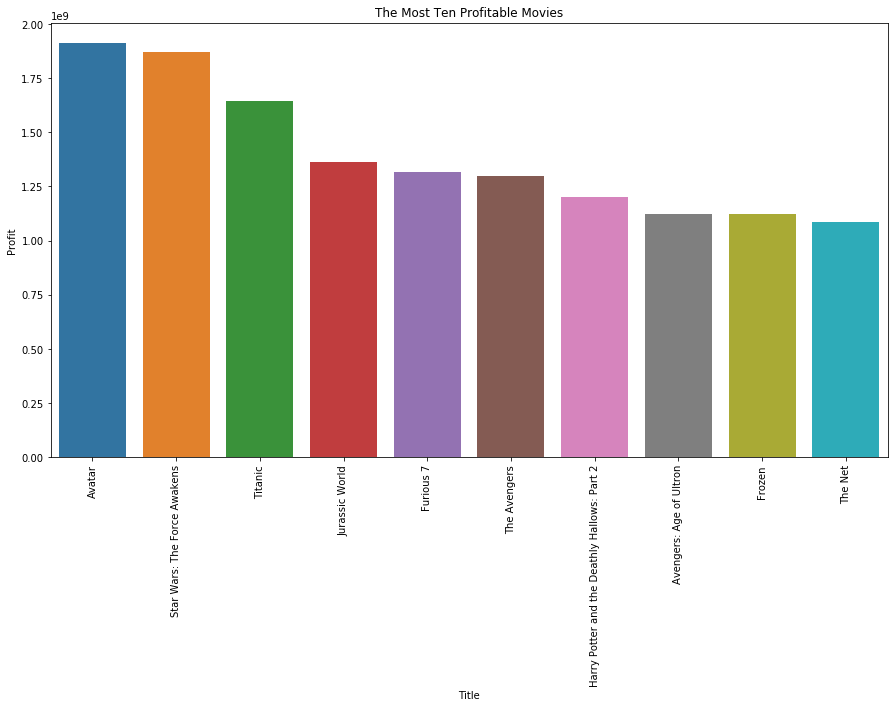

In [21]:
# let's visualize the most ten profitable movies
plt.figure(figsize=(15,8))
ten_movies=df[['original_title','net_profit']].sort_values('net_profit',ascending=False).head(10)
sns.barplot(x='original_title',y='net_profit',data=ten_movies)
plt.xlabel('Title')
plt.ylabel('Profit')
plt.title("The Most Ten Profitable Movies")
plt.xticks(rotation=90)
plt.show()

### Research Question 3  (Which years has biggest and smallest number of producing Movies?)

In [13]:
# calculating the numder of produced movies during each year
count=df['release_year'].value_counts()

print(count);

2011    199
2013    180
2010    178
2009    174
2006    169
2008    167
2014    165
2007    165
2005    163
2015    160
2012    158
2004    147
2002    127
2003    121
2001    121
1999    116
2000    106
1998     92
1997     90
1996     86
1995     81
1993     72
1994     62
1988     57
1990     53
1992     53
1989     51
1991     50
1986     48
1987     46
1984     42
1985     41
1983     31
1981     30
1982     26
1980     23
1977     19
1978     17
1979     16
1976     15
1971     13
1967     13
1974     13
1973     12
1970     11
1961     10
1975      9
1968      9
1972      8
1964      7
1962      7
1963      6
1965      5
1966      5
1960      5
1969      4
Name: release_year, dtype: int64


In [14]:
# the year that has the smallest  number of producing Movies
small_num=df['release_year'].value_counts().min()
small_num_id=df['release_year'].value_counts().idxmin()
print("the smallest number of producing Movies equal {} --> in: {}".format(small_num,small_num_id));
# the year that has the biggest  number of producing Movies
big_num=df['release_year'].value_counts().max()
big_num_id=df['release_year'].value_counts().idxmax()
print("the biggest number of producing Movies equal {} --> in: {}".format(big_num,big_num_id));

the smallest number of producing Movies equal 4 --> in: 1969
the biggest number of producing Movies equal 199 --> in: 2011


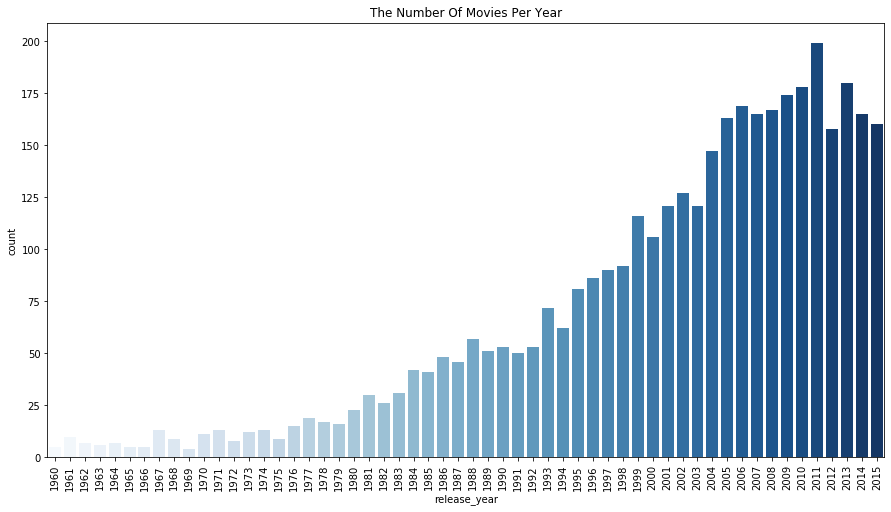

In [24]:
# visualization of  the number of movies per years
plt.figure(figsize=(15,8))
plt.title("The Number Of Movies Per Year")
plt.xticks(rotation=90)
sns.countplot(df['release_year'],palette='Blues')
plt.show()

### Research Question 4  (Average (budgets,runtime) of the movies)

In [20]:
# define a function to calculate and return average of a column
def average(column):
    return df[column].mean()

In [21]:
# calculate the average of budget column
print('the average budget to make a movie equal : ')
average('budget')

the average budget to make a movie equal : 


37203696.954852104

In [22]:
# calculate the average of runtime column
print("the average runtime of a movie equal : ")
average('runtime')

the average runtime of a movie equal : 


109.22029060716139

### Research Question 5  (Relation between profits and years and which year had maximum and minimum profits?)

In [24]:
profits_year = df.groupby('release_year')['net_profit'].sum()

In [25]:
# 1-the max profit 
profits_year.max()

19032145273.0

In [26]:
# 2-the year in which the max profit
profits_year.idxmax()

2015

In [27]:
# 3-the min profit
profits_year.min()

52468689.0

In [28]:
# 4- the year in which the min profit
profits_year.idxmin()

1966

In [29]:
print(" the maximum profit equal {} that happend in: {}".format(profits_year.max(),profits_year.idxmax()));
print(" the minimum profit equal {} that happend in: {}".format(profits_year.min(),profits_year.idxmin()));

 the maximum profit equal 19032145273.0 that happend in: 2015
 the minimum profit equal 52468689.0 that happend in: 1966


<a id='conclusions'></a>
## Conclusions

Using this data, we were able to find out which movies have the largest budgets, and thus know the heroes of this work. Through this, we can conclude that if you want the movie to generate revenues, it must include these heroes. We were also able to know the extent of the growth of the movie industry’s revenues over the time period mentioned in the database Knowing the amounts that have been spent on the manufacture of these works, and we also learned about the extent of the expansion and growth of this industry over the years through a planned vision of the number of works that have been produced over the years.

<a id='limitations'></a>
## Limitations :
This analysis was done considering the movies. we are not sure if the data provided to us is completel corect and up-to-date. As mentioned before the budget and revenue column do not have currency unit, it might be possible different movies have budget in different currency according to the country they are produce in. So a disparity arises here which can state the complete analysis wrong. Dropping the rows with NAN values also affected the overall analysis Important note: I worked on this database without knowing whether this data is correct or not